In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import statsmodels.api as sm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

침수흔적도 = pd.read_csv('./데이터/서울시_침수흔적도.csv',encoding='utf-8')
불투수율 = pd.read_csv('./데이터/Green/서울특별시_자치구별 불투수면적 현황.csv',encoding='cp949')

In [108]:
침수흔적도 = 침수흔적도[(침수흔적도['침수시작날짜']>=20220808) & (침수흔적도['침수시작날짜']<=20220810)]


침수흔적도 = 침수흔적도[['자치구', '침수수심', '침수원인',
                        '침수평균해발고도', '침수면적', 
                        '침수시작날짜', '침수종료날짜', 
                        '침수시작시간', '침수종료시간',
                        '침수내용', '주소', 
                        '행정코드', 
                        '침수연도', 
                        '지오메트리']]


In [109]:
#
침수흔적도['침수시작날짜'] = 침수흔적도['침수시작날짜'].replace(2180828, 20180828)

# '침수종료날짜' 컬럼의 날짜 형식 통일
침수흔적도['침수종료날짜'] = pd.to_datetime(침수흔적도['침수종료날짜'], errors='coerce').dt.strftime('%Y%m%d')


# 'NaN'을 실제 NaN 값으로 변환
침수흔적도['침수종료날짜'] = 침수흔적도['침수종료날짜'].replace('NaN', np.nan)

# '침수종료날짜'의 NaN 값을 '침수시작날짜'로 대체
침수흔적도['침수종료날짜'] = pd.to_datetime(침수흔적도['침수종료날짜'], errors='coerce').dt.strftime('%Y%m%d')
침수흔적도['침수종료날짜'] = 침수흔적도['침수종료날짜'].fillna(침수흔적도['침수시작날짜'].astype(str))


In [110]:
# 침수날짜 컬럼 생성: 각 행에 대해 침수 시작부터 종료까지의 모든 날짜 생성
침수흔적도['침수날짜'] = 침수흔적도.apply(
    lambda x: pd.date_range(
        start=pd.to_datetime(str(x['침수시작날짜']), format='%Y%m%d'),  
        end=pd.to_datetime(str(x['침수종료날짜']), format='%Y%m%d'),    
        freq='D'
    ).strftime('%Y%m%d').tolist(),
    axis=1
)

# explode를 사용하여 '침수날짜'의 각 날짜를 독립적인 행으로 확장
침수흔적도 = 침수흔적도.explode('침수날짜')

침수흔적도



,자치구,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,행정코드,침수연도,지오메트리,침수날짜
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.00,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,"POLYGON ((956425.1271956386 1963792.043624141,...",20220808
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.00,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,1130510400,2022,"POLYGON ((956590.6408143371 1963700.11134354, ...",20220808
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.00,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,1130510400,2022,"POLYGON ((956383.2795007367 1963392.863235048,...",20220808
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.00,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,1156010400,2022,"POLYGON ((947842.214000747 1946702.945905377, ...",20220808
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.00,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,1156010400,2022,"POLYGON ((947842.214000747 1946702.945905377, ...",20220809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,용산구,0.10,2022년 8.8 ~17. 호우,17.31,190.53,20220808,20220809,21,5,내수침수,서울특별시 용산구 신창동 80-24,1117011300,2022,"POLYGON ((951822.4880110008 1948650.290386308,...",20220809
8666,성북구,0.10,2022년 8.8 ~17. 호우,84.05,33.97,20220808,20220810,19,12,내수침수,서울특별시 성북구 돈암동 74-226,1129010300,2022,"POLYGON ((957841.0766973767 1955305.179045144,...",20220808
8666,성북구,0.10,2022년 8.8 ~17. 호우,84.05,33.97,20220808,20220810,19,12,내수침수,서울특별시 성북구 돈암동 74-226,1129010300,2022,"POLYGON ((957841.0766973767 1955305.179045144,...",20220809
8666,성북구,0.10,2022년 8.8 ~17. 호우,84.05,33.97,20220808,20220810,19,12,내수침수,서울특별시 성북구 돈암동 74-226,1129010300,2022,"POLYGON ((957841.0766973767 1955305.179045144,...",20220810


In [111]:
불투수율 = 불투수율.drop(columns=['비고','연번'])
불투수율 = 불투수율.rename(columns= {
    '구 전체면적(헥타르)' : '구전체면적',
    ' 불투수면적(헥타르) ' : '불투수면적',
    '불투수면적 비율(퍼센트)' : '불투수면적 비율'
})

In [112]:
불투수율.columns

Index(['자치구', '구전체면적', '불투수면적', '불투수면적 비율'], dtype='object')

C:\Users\ciw96\AppData\Local\Temp\ipykernel_49484\3648324004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='자치구', y='불투수면적 비율', data=불투수율, palette='viridis')


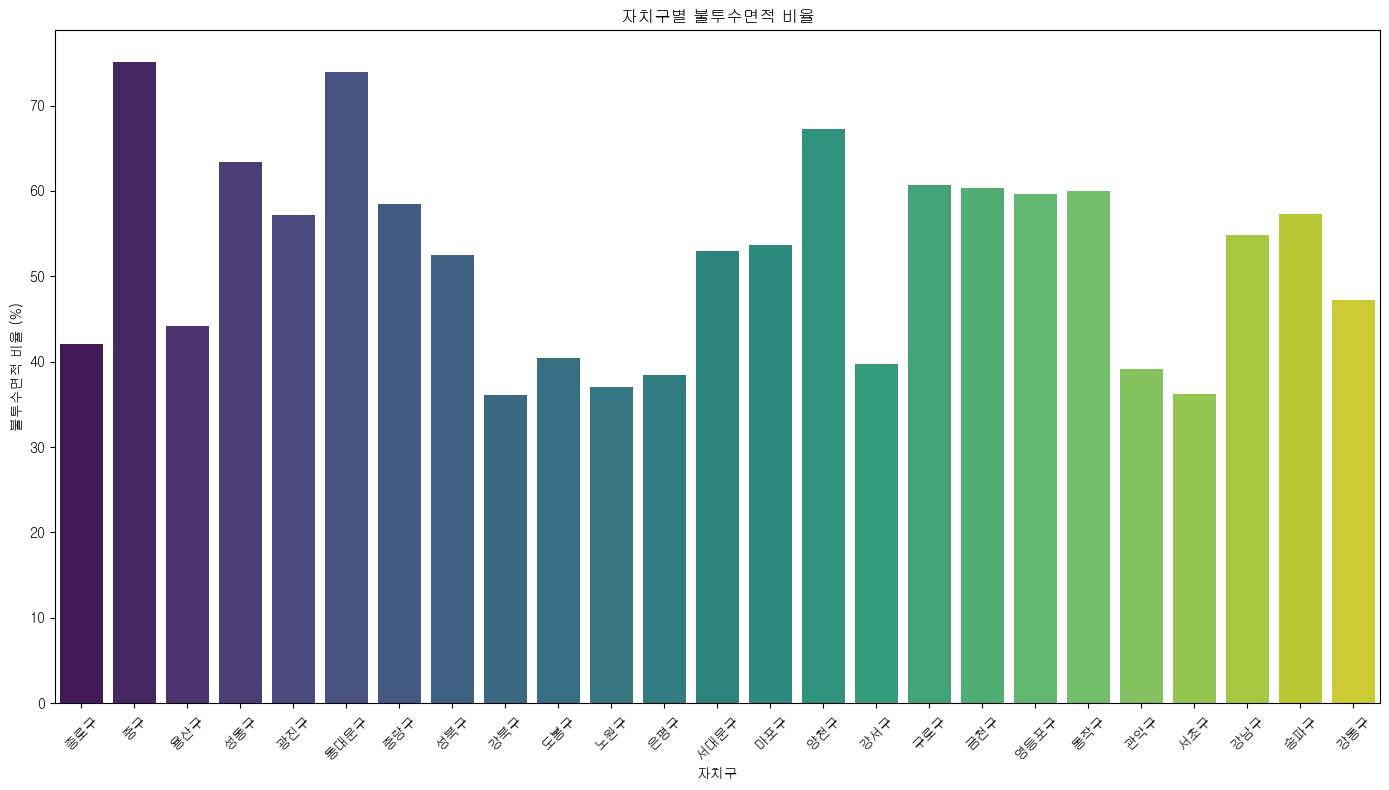

In [113]:
# 막대 그래프 그리기
plt.figure(figsize=(14, 8))
sns.barplot(x='자치구', y='불투수면적 비율', data=불투수율, palette='viridis')
plt.xticks(rotation=45)
plt.title('자치구별 불투수면적 비율')
plt.xlabel('자치구')
plt.ylabel('불투수면적 비율 (%)')
plt.tight_layout()
plt.show()

In [114]:
from functools import reduce

dfs = [침수흔적도,불투수율]

df1 = reduce(lambda left, right:pd.merge(left,right, on='자치구',how='outer'),dfs)

df1 = df1.dropna(subset=['침수수심'])

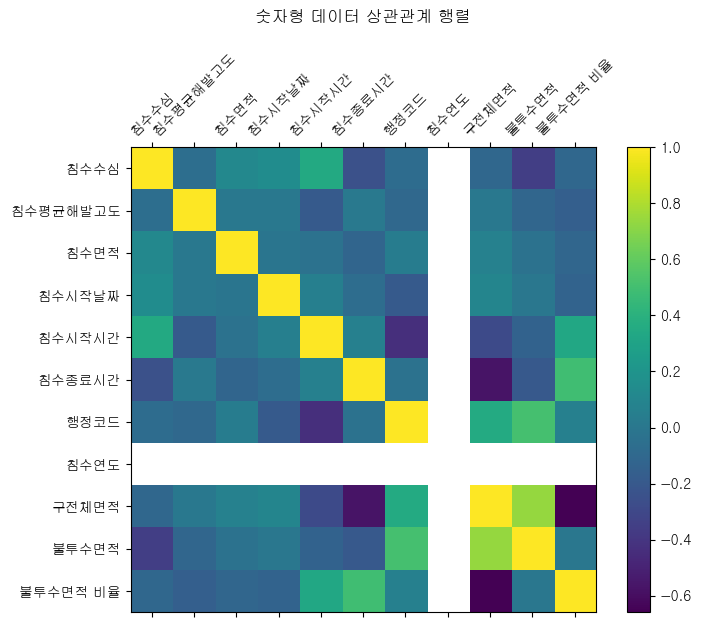

In [115]:
# 숫자형 데이터만 선택
numeric_df1 = df1.select_dtypes(include=['number'])

# 상관관계 계산
correlation_matrix = numeric_df1.corr()

# 상관관계 그래프 그리기
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('숫자형 데이터 상관관계 행렬', pad=20)
plt.show()

In [116]:
불투수율

,자치구,구전체면적,불투수면적,불투수면적 비율
0,종로구,2312.4,971.6,42.02
1,중구,998.2,749.2,75.05
2,용산구,2196.7,970.0,44.16
3,성동구,1642.2,1040.4,63.36
4,광진구,1788.9,1023.9,57.23
5,동대문구,1459.4,1078.3,73.89
6,중랑구,1829.9,1070.6,58.51
7,성북구,2487.1,1305.1,52.48
8,강북구,2381.9,861.2,36.15
9,도봉구,2077.7,839.8,40.42


In [117]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# 침수 & 하천
# 데이터 준비
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

X = numeric_df.drop(columns=['침수수심'])
y = df1['침수수심']

# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 학습
model = sm.OLS(y, X).fit()

# 모델 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   침수수심   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     3184.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:36:31   Log-Likelihood:                 12282.
No. Observations:               26908   AIC:                        -2.454e+04
Df Residuals:                   26898   BIC:                        -2.446e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
침수평균해발고도   -1.416e-05   5.32e-05     -0.266      0.7

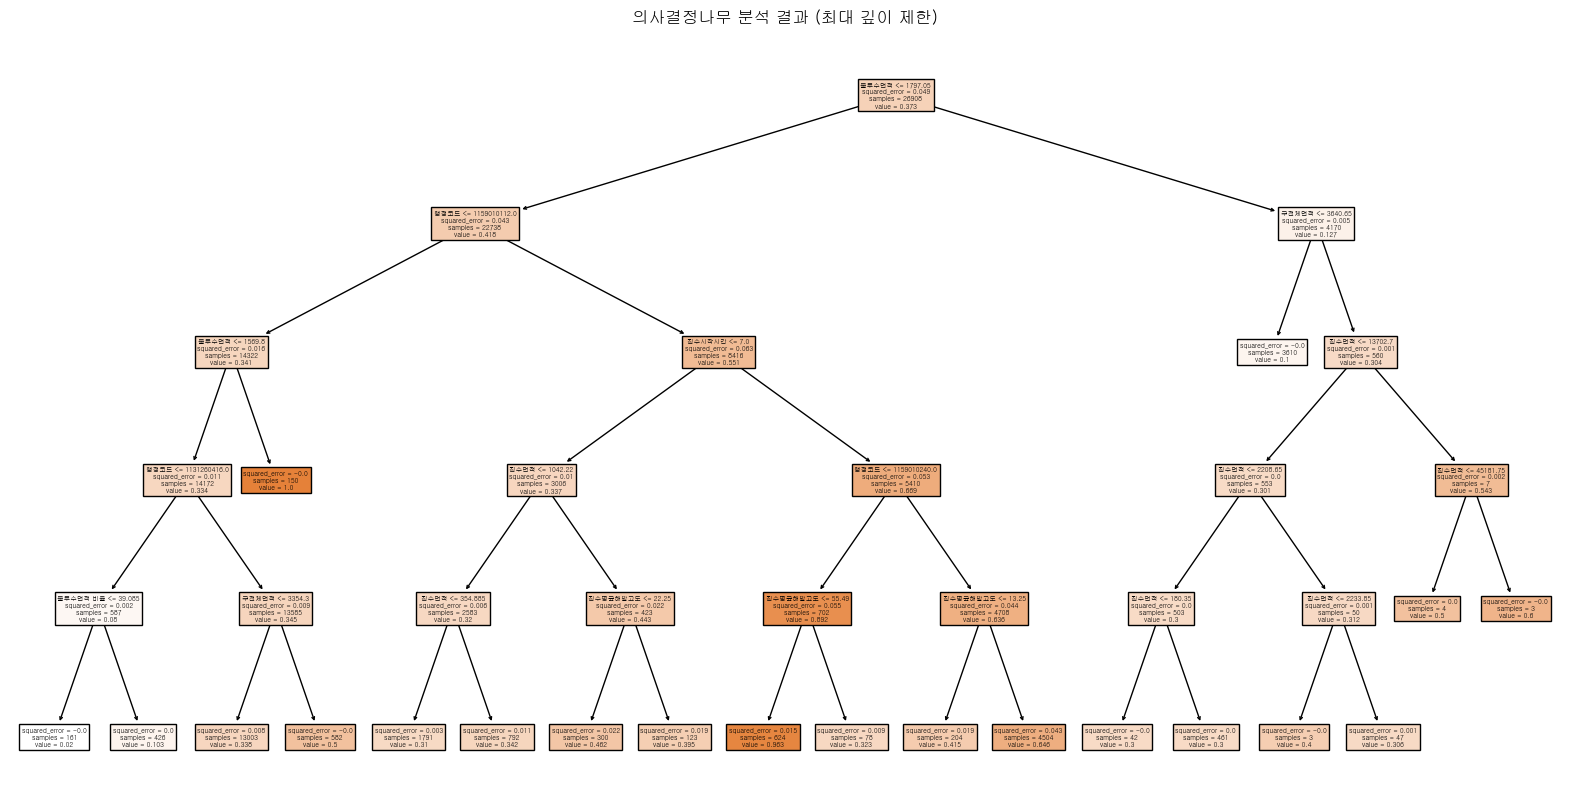

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 데이터 준비
X = numeric_df.drop(columns=['침수수심'])
y = df1['침수수심'].dropna()

# 의사결정나무 모델 학습 (최대 깊이 제한)
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X, y)

# 의사결정나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.title('의사결정나무 분석 결과 (최대 깊이 제한)')
plt.show()

In [120]:
import pandas as pd

# 변수 중요도 확인
feature_importance = tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

    Feature  Importance
8     불투수면적    0.374745
5      행정코드    0.322068
3    침수시작시간    0.219452
0  침수평균해발고도    0.040368
7     구전체면적    0.035866
1      침수면적    0.006672
9  불투수면적 비율    0.000829
2    침수시작날짜    0.000000
4    침수종료시간    0.000000
6      침수연도    0.000000


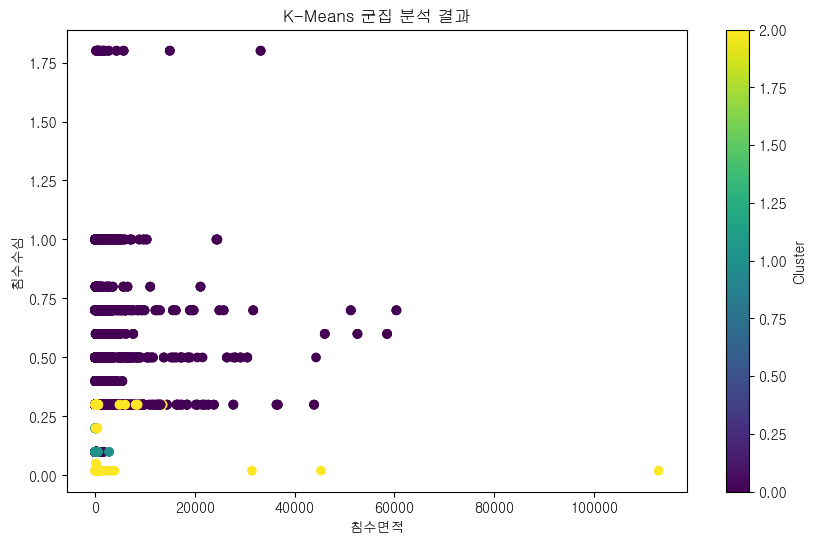

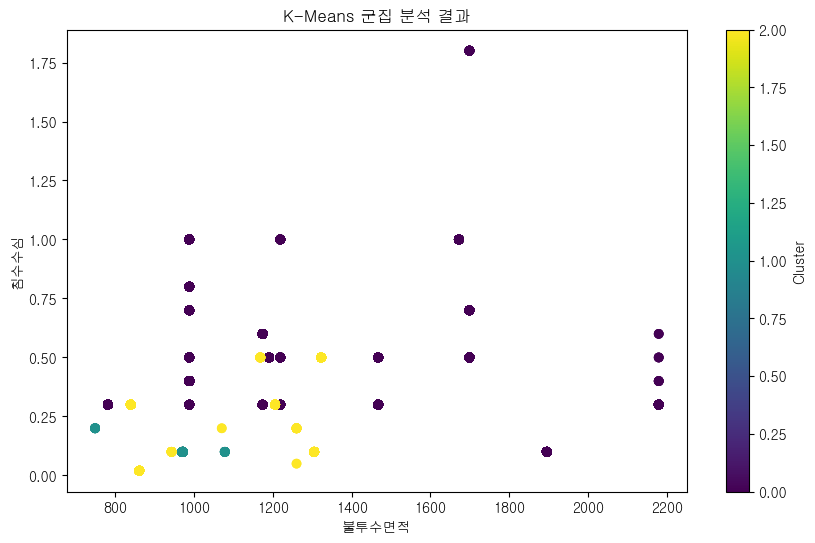

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# K-Means 군집 분석 및 시각화
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['침수면적'], y, c=clusters, cmap='viridis')
plt.title('K-Means 군집 분석 결과')
plt.xlabel('침수면적')
plt.ylabel('침수수심')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X['불투수면적'], y, c=clusters, cmap='viridis')
plt.title('K-Means 군집 분석 결과')
plt.xlabel('불투수면적')
plt.ylabel('침수수심')
plt.colorbar(label='Cluster')
plt.show()


In [122]:
df1.isnull().sum()

자치구         0
침수수심        0
침수원인        0
침수평균해발고도    0
침수면적        0
침수시작날짜      0
침수종료날짜      0
침수시작시간      0
침수종료시간      0
침수내용        0
주소          0
행정코드        0
침수연도        0
지오메트리       0
침수날짜        0
구전체면적       0
불투수면적       0
불투수면적 비율    0
dtype: int64

In [123]:
# 침수 & 지형높이
# 데이터 준비
merged_data = df1[['구전체면적', '불투수면적', '불투수면적 비율', '침수수심']].dropna()
X = merged_data[['구전체면적', '불투수면적', '불투수면적 비율']]
y = merged_data['침수수심']

# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 의사결정나무 모델 학습
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'의사결정나무 MSE: {mse_tree}')

의사결정나무 MSE: 0.015560982810244026


In [125]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'랜덤 포레스트 MSE: {mse_rf}')

랜덤 포레스트 MSE: 0.015560106536103277


In [126]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'선형 회귀 MSE: {mse_lr}')

선형 회귀 MSE: 0.029330012150828897


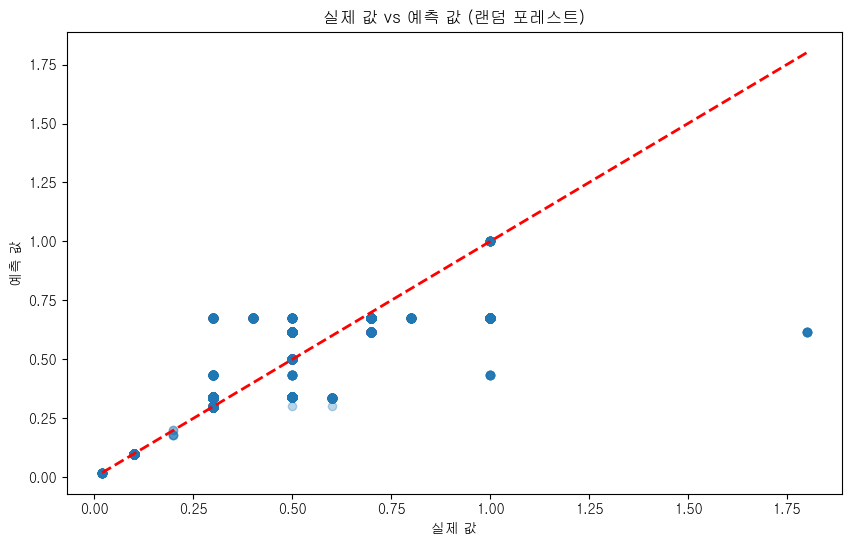

In [127]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값 (랜덤 포레스트)')
plt.show()

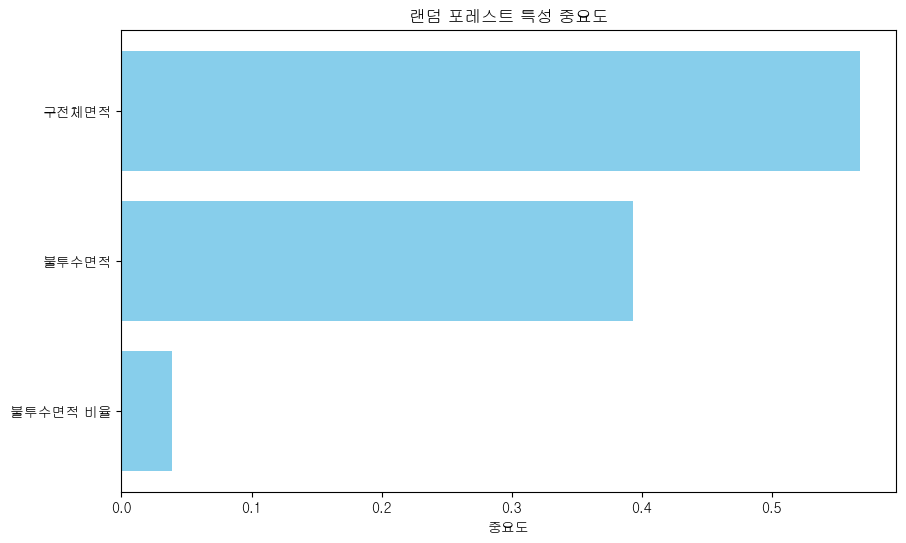

In [128]:
# 특성 중요도 시각화
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('중요도')
plt.title('랜덤 포레스트 특성 중요도')
plt.gca().invert_yaxis()
plt.show()

In [129]:
import folium
from shapely import wkt
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from pyproj import Transformer
import geopandas as gpd

In [130]:
# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [131]:
# 예측
y_pred_rf = rf_model.predict(X_test)

In [132]:
# 지리적 좌표 (위도, 경도) 추가
def get_lat_long(geometry, epsg_code="epsg:5179"):
    transformer = Transformer.from_crs(epsg_code, "epsg:4326", always_xy=True)
    centroid = geometry.centroid
    lon, lat = transformer.transform(centroid.x, centroid.y)
    return lat, lon 

In [133]:
# EPSG:5179 사용하여 좌표 변환
test_data = df1.loc[X_test.index].copy()
test_data['위도'], test_data['경도'] = zip(*test_data['지오메트리'].apply(get_lat_long))
test_data['예측수심'] = y_pred_rf

# 디버깅: 변환된 좌표 확인
print(test_data[['지오메트리', '위도', '경도', '예측수심']].head())

AttributeError: 'str' object has no attribute 'centroid'

In [ ]:
# GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(test_data, geometry='지오메트리')
gdf.set_crs(epsg=5179, inplace=True)  # CRS 설정

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,...,행정코드,침수연도,지오메트리,침수날짜,구전체면적,불투수면적,불투수면적 비율,위도,경도,예측수심
10005,동작구,0.7,2022년 8.8 ~17. 호우,16.94,32.44,20220808.0,20220810,18.0,24.0,내수침수,...,1.159011e+09,2022.0,"POLYGON ((953643.362 1942711.618, 953646.753 1...",20220810,1646.0,988.3,60.04,37.482460,126.975684,0.676295
6523,도봉구,0.3,2022년 8.8 ~17. 호우,41.14,92.64,20220808.0,20220809,18.0,20.0,내수침수,...,1.132010e+09,2022.0,"POLYGON ((958685.804 1961076.132, 958696.068 1...",20220808,2077.7,839.8,40.42,37.648207,127.031727,0.300000
25078,영등포구,0.5,2022년 8.8 ~17. 호우,12.80,42.00,20220808.0,20220810,20.0,24.0,내수침수,...,1.156013e+09,2022.0,"POLYGON ((947310.733 1943545.143, 947319.622 1...",20220808,2461.8,1467.5,59.61,37.489587,126.904005,0.340569
1915,관악구,0.3,2022년 8.8 ~17. 호우,21.60,1068.79,20220808.0,20220810,1.0,24.0,내수침수,...,1.162010e+09,2022.0,"POLYGON ((949429.453 1942941.875, 949440.731 1...",20220810,2996.6,1174.3,39.19,37.484416,126.928265,0.337284
20464,영등포구,0.3,2022년 8.8 ~17. 호우,12.30,97.96,20220808.0,20220810,20.0,24.0,내수침수,...,1.156013e+09,2022.0,"POLYGON ((946826.815 1944980.308, 946834.078 1...",20220808,2461.8,1467.5,59.61,37.502496,126.898413,0.340569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11969,서초구,0.5,2022년 8.8 ~17. 호우,16.22,55.38,20220808.0,20220810,13.0,1.0,내수침수,...,1.165010e+09,2022.0,"POLYGON ((954330.096 1942991.602, 954330.465 1...",20220809,4695.5,1698.9,36.18,37.484954,126.983412,0.615414
2527,관악구,0.3,2022년 8.8 ~17. 호우,23.62,98.49,20220808.0,20220810,1.0,24.0,내수침수,...,1.162010e+09,2022.0,"POLYGON ((949383.436 1942438.293, 949389.347 1...",20220810,2996.6,1174.3,39.19,37.479822,126.927584,0.337284
23164,영등포구,0.3,2022년 8.8 ~17. 호우,11.60,167.88,20220808.0,20220810,20.0,24.0,내수침수,...,1.156013e+09,2022.0,"POLYGON ((946832.701 1943706.129, 946836.738 1...",20220808,2461.8,1467.5,59.61,37.491006,126.898515,0.340569
15322,송파구,0.1,2022년 8.8 ~17. 호우,18.35,213.00,20220808.0,20220817,1.0,23.0,내수침수,...,1.171011e+09,2022.0,"POLYGON ((966951.022 1941221.425, 966958.664 1...",20220816,3310.9,1895.2,57.24,37.469509,127.126258,0.100000


In [ ]:
# Folium 지도에 예측 결과 시각화
map_center = [test_data['위도'].mean(), test_data['경도'].mean()]
map = folium.Map(location=map_center, zoom_start=11)  # 서울 중심으로 설정

In [ ]:
# GeoJson 추가
folium.Choropleth(
    geo_data=gdf,
    name='침수수심 예측',
    data=gdf,
    columns=['지오메트리', '예측수심'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='예측 침수수심 (m)'
).add_to(map)

# GeoJson 스타일 적용
style_function = lambda x: {
    'fillColor': '#ff0000' if x['properties']['예측수심'] > 1 else '#ffff00' if x['properties']['예측수심'] > 0.5 else '#00ff00',
    'color': 'black',
    'weight': 1,
    'fillOpacity': 0.6
}

highlight_function = lambda x: {'weight': 3, 'fillOpacity': 0.9}

folium.GeoJson(
    gdf,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['예측수심'],
        aliases=['예측 침수수심: '],
        localize=True
    )
).add_to(map)

# 지도 저장
map.save("flood_prediction_map_colored.html")
            

In [134]:
df1['지오메트리']

0        POLYGON ((958266.7548537395 1944412.821693935,...
1        POLYGON ((961656.4046361586 1941847.951360239,...
2        POLYGON ((961469.0843631719 1942206.137323901,...
3        POLYGON ((961540.5445842013 1942201.814513462,...
4        POLYGON ((961394.0973640293 1942081.091478479,...
                               ...                        
26905    POLYGON ((953949.0970126173 1952106.378148717,...
26906    POLYGON ((957744.0517106534 1952240.993095408,...
26907    POLYGON ((957206.2860872567 1952021.901256554,...
26908    POLYGON ((965741.9688328103 1955877.730559613,...
26909    POLYGON ((965716.1276267384 1955887.325136765,...
Name: 지오메트리, Length: 26908, dtype: object